In [2]:
import pandas as pd

data = pd.read_csv('./dataset/ch4-1.csv')

print(data.head())
print(data.info())

  hatchery  chick
0        A     30
1        B     30
2        C     29
3        D     26
4        E     24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hatchery  7 non-null      object
 1   chick     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None


# data 기초통계량

In [3]:
data.describe()

,chick
count,7.000000
mean,27.714286
std,2.214670
min,24.000000
25%,26.500000
50%,28.000000
75%,29.500000
max,30.000000


In [4]:
## chick의 합

print(f"chick 합 : {data['chick'].sum()}")

## chick의 평균

print(f"chick 평균 : {data['chick'].mean()}")

## chick의 표준편차

print(f"chick 표준편차 : {data['chick'].std()}")

## chick의 최대값

print(f"chick 최대값 : {data['chick'].max()}")

## chick의 중간값

print(f"chick 중간값 : {data['chick'].median()}")

## chick의 최소값

print(f"chick 최소값 : {data['chick'].min()}")


chick 합 : 194
chick 평균 : 27.714285714285715
chick 표준편차 : 2.2146697055682827
chick 최대값 : 30
chick 중간값 : 28.0
chick 최소값 : 24


# 파생변수

In [5]:
## 부화율 (실제 부화량 / 기존 210개 예상 )

print(f"chick 부화율 (%) : {(data.chick.sum() / 210).round(2)}%")



chick 부화율 (%) : 0.92%


# 데이터 정렬

In [6]:
data.sort_values(by = 'chick', ascending=True)

,hatchery,chick
4,E,24
3,D,26
6,G,27
5,F,28
2,C,29
0,A,30
1,B,30


# 그래프

## bar 차트

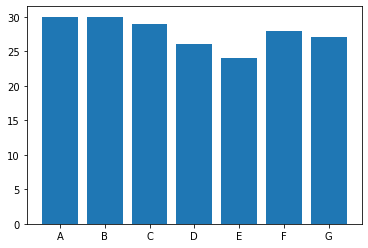

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.bar(data['hatchery'], data['chick']) # 가로 / 세로
plt.show()

In [22]:
import matplotlib.font_manager as fm

fm_list = [font.name for font in fm.fontManager.ttflist]
fm_list.sort()
print(fm_list[:3])

plt_fonts = 'AppleGothic'

['.Aqua Kana', '.Arabic UI Display', '.Arabic UI Text']


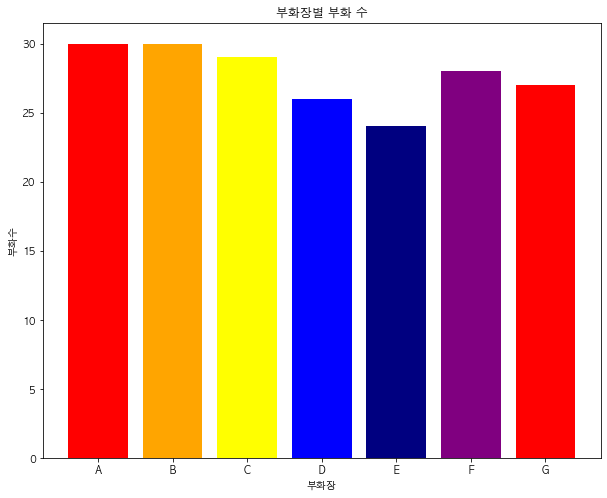

In [23]:
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(10, 8))
plt.bar(data['hatchery'], data['chick'], color = ('red', 'orange', 'yellow', 'blue', 'navy', 'purple'))
plt.title('부화장별 부화 수')
plt.xlabel('부화장')
plt.ylabel('부화수')
plt.show()

## seaborn 색상 사용

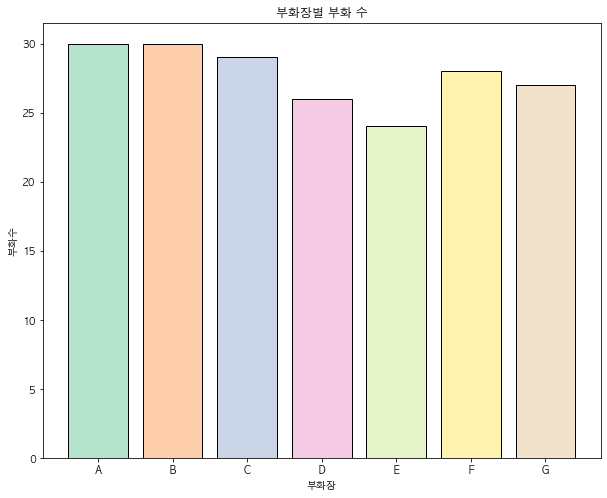

In [25]:
import seaborn as sns
colors = sns.color_palette('Pastel2', 7)

plt.figure(figsize=(10, 8))
plt.bar(data['hatchery'], data['chick'], color = colors, edgecolor='black')
plt.title('부화장별 부화 수')
plt.xlabel('부화장')
plt.ylabel('부화수')
plt.show()

## 텍스트 표시

    - plt.text(x, y, 표시할 텍스트)
    

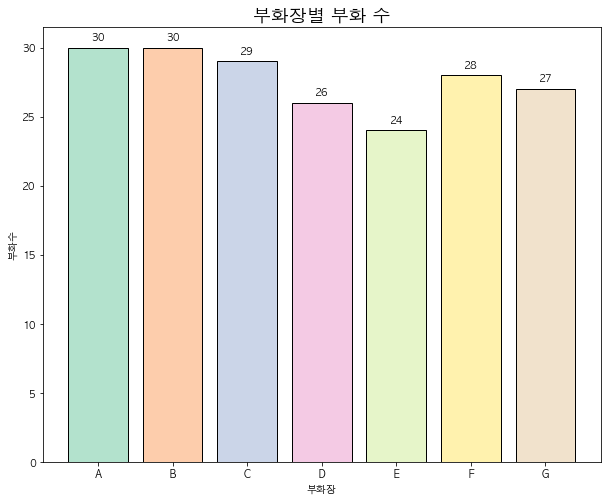

In [32]:
def addText(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.5, y[i], ha = 'center')

colors = sns.color_palette('Pastel2', 7)

plt.figure(figsize=(10, 8))
plt.bar(data['hatchery'], data['chick'], color = colors, edgecolor='black')
addText(data['hatchery'], data['chick'])
plt.title('부화장별 부화 수', fontsize = 18)
plt.xlabel('부화장')
plt.ylabel('부화수')
plt.show()

## 가로 선 추가하기
    - plt.hlines(y좌표, x좌표 최소, x좌표 최대)

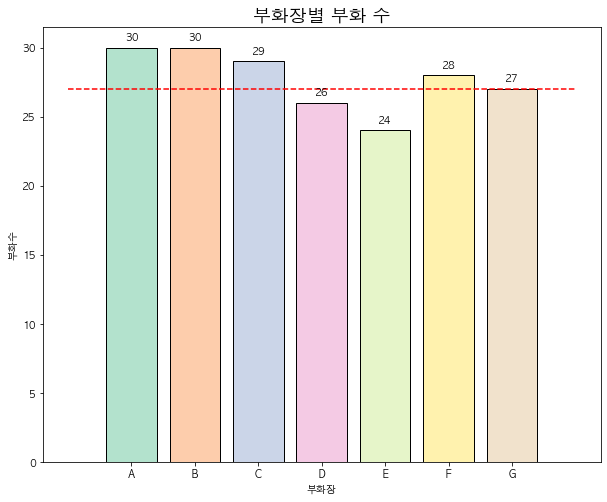

In [37]:
def addText(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.5, y[i], ha = 'center')

colors = sns.color_palette('Pastel2', 7)

plt.figure(figsize=(10, 8))
plt.bar(data['hatchery'], data['chick'], color = colors, edgecolor='black')
addText(data['hatchery'], data['chick'])

plt.hlines(int(data['chick'].mean()), -1, 7, colors='red', linestyles='dashed') # 평균 가로선 
plt.title('부화장별 부화 수', fontsize = 18)
plt.xlabel('부화장')
plt.ylabel('부화수')
plt.show()

## pie 차트

In [41]:
## 부화장별 비중

pct = data['chick'] / data['chick'].sum()
pct

0    0.154639
1    0.154639
2    0.149485
3    0.134021
4    0.123711
5    0.144330
6    0.139175
Name: chick, dtype: float64

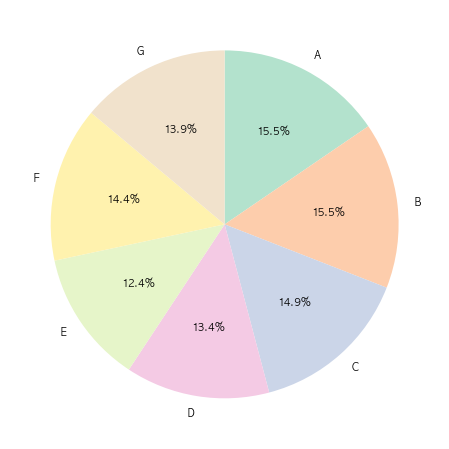

In [51]:
colors = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 8))
plt.pie(pct, labels=data['hatchery'], autopct= '%.1f%%',
       colors= colors, startangle=90, counterclock=False)

plt.show()


# 정규분포와 중심극한정리

In [53]:
import pandas as pd

data2 = pd.read_csv('./dataset/ch4-2.csv')

display(data2.head())
data2.info()


,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [54]:
data2.describe()

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


## 히스토그램으로 분포 모양 확인

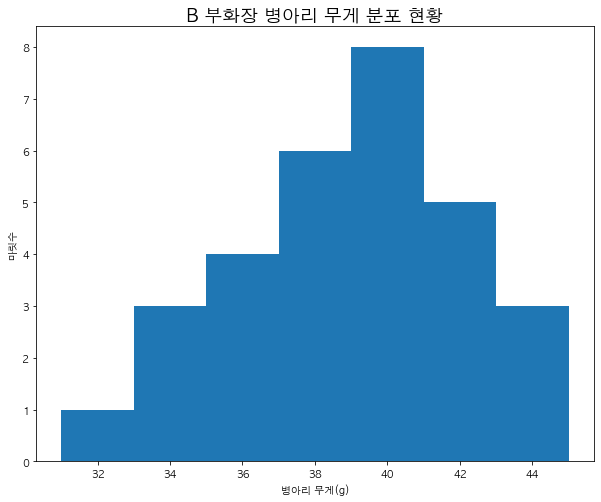

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10, 8))

plt.hist(data2['weight'], bins=7)
plt.title('B 부화장 병아리 무게 분포 현황', fontsize=18)
plt.xlabel('병아리 무게(g)')
plt.ylabel('마릿수')
plt.show()



## boxplot으로 데이터 분포 확인

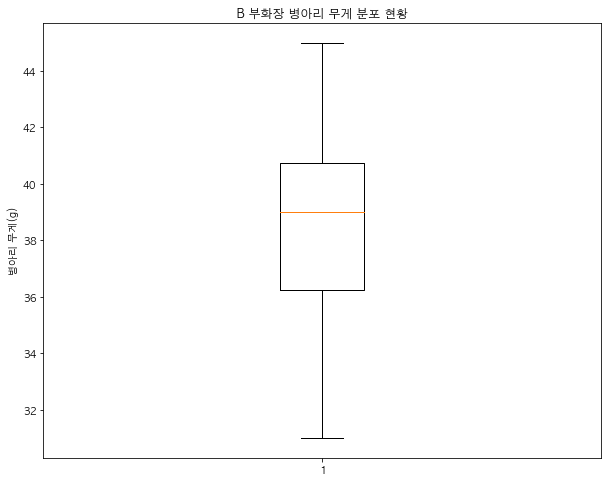

In [59]:
plt.figure(figsize = (10, 8))
plt.boxplot(data2.weight)
plt.title('B 부화장 병아리 무게 분포 현황')
plt.ylabel('병아리 무게(g)')
plt.show()

# 가설검정 (사료 제조사별 병아리 무게 차이?)

In [61]:
import pandas as pd

data3= pd.read_csv('./dataset/ch4-3.csv')
data3.head()

## 부화장 A와 B 각각에서 태어난 30마리 병아리 중 10마리씩 sampling

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116


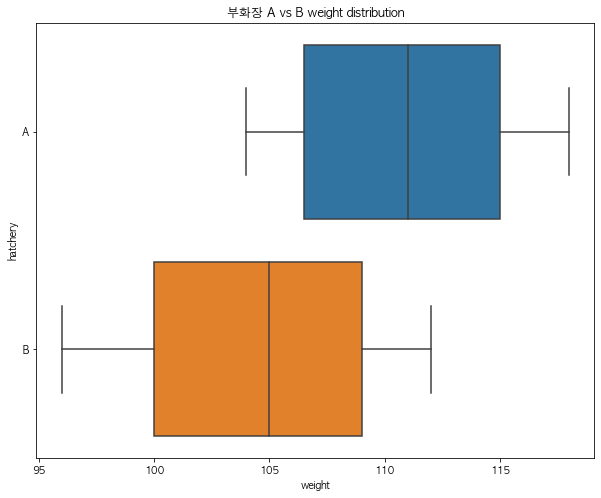

In [62]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(x= 'weight', y='hatchery', data=data3,)
plt.title('부화장 A vs B weight distribution')
plt.show()

## 정규분포 검정

In [65]:
import scipy as sp

test_a = data3.loc[data3.hatchery == 'A', 'weight']
test_b = data3.loc[data3.hatchery == 'B', 'weight']

# A 부화장 정규분포 검정
display(sp.stats.shapiro(test_a))

# B 부화장 정규분포 검정
display(sp.stats.shapiro(test_b))


# shapiro H0 : 정규분포이다. H1 : 정규분포 아니다.
# 두개 0.05 보다 크므로 정규분포이다.

ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530338883399963)

ShapiroResult(statistic=0.9390685558319092, pvalue=0.5426967740058899)

In [66]:
sp.stats.ttest_ind(test_a, test_b)

Ttest_indResult(statistic=2.842528280230058, pvalue=0.010803990633924202)